In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    plt.imshow(img, cmap = 'gray')
    plt.show()

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[:-1:2]
    return "[" + ",".join(str(x) for x in runs) + "]"

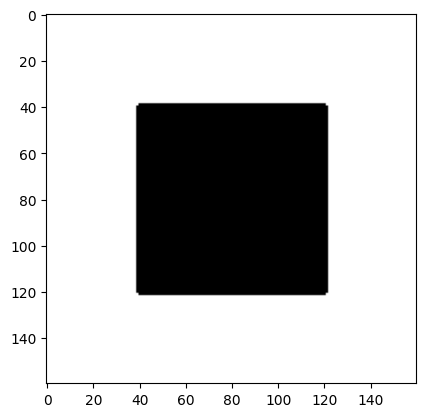

[1,6280,6362,78,6523,77,6683,77,6843,77,7003,77,7163,77,7323,77,7483,77,7643,77,7803,77,7963,77,8123,77,8283,77,8443,77,8603,77,8763,77,8923,77,9083,77,9243,77,9403,77,9563,77,9723,77,9883,77,10043,77,10203,77,10363,77,10523,77,10683,77,10843,77,11003,77,11163,77,11323,77,11483,77,11643,77,11803,77,11963,77,12123,77,12283,77,12443,77,12603,77,12763,77,12923,77,13083,77,13243,77,13403,77,13563,77,13723,77,13883,77,14043,77,14203,77,14363,77,14523,77,14683,77,14843,77,15003,77,15163,77,15323,77,15483,77,15643,77,15803,77,15963,77,16123,77,16283,77,16443,77,16603,77,16763,77,16923,77,17083,77,17243,77,17403,77,17563,77,17723,77,17883,77,18043,77,18203,77,18363,77,18523,77,18683,77,18843,77,19003,77,19163,77,19323,78,19482,6119]
734


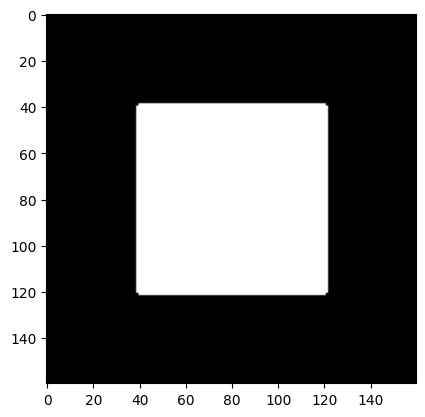

In [8]:
img = np.zeros((160, 160), np.uint8)

cv2.rectangle(img, (40, 40), (120, 120), 255, 2)    # border
cv2.rectangle(img, (40, 40), (120, 120), 255, -1)   # fill

mask = img // 255

invert = np.zeros((160, 160), np.uint8)
invert += 255
img = invert - img

show(img)
print(rle_encode(img))
print(len(rle_encode(img)))

show(mask)

In [9]:
from itertools import groupby
from pycocotools import mask as msk

def coco_rle(mask : np.ndarray, api : bool = False):
    '''
    Generates an rle-encoding string which can be used in coco-json formatting. This appears to be much slower than rle_encode, but since the dataset must only be generated _once_ in most cases, it is probably worth to spend the extra generation time to have usable annotations.
    \n Impelements top response of this thread: https://stackoverflow.com/questions/49494337/encode-numpy-array-using-uncompressed-rle-for-coco-dataset

    PARAMETERS
    ----------
    `mask : ndarray` np array binary mask, where 1 is masked and 0 unmasked.
    `api : bool` use cocoapi version of the encoder

    RETURNS
    rle : dict in coco-rle format.
    '''
    rle = {
        'counts': [],
        'size': list(mask.shape)
    }
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(mask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    
    return rle if not api else msk.encode(np.asarray(mask, order='F'))

In [10]:
from pprint import pprint

rle_mask = coco_rle(mask, True)
print(rle_mask)

{'size': [160, 160], 'counts': b'XT6a2^22O0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001Nil5'}
